In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.iso.ercot import create_day_ahead_load_scenario

In [2]:
load_zone_actual_df = pd.read_csv('../data/Load/ERCOT/Actual/load_actual_1h_zone_2017_2018_utc.csv',
                                 parse_dates=['Time'],index_col='Time')
load_zone_forecast_df = pd.read_csv('../data/Load/ERCOT/Day-ahead/load_day_ahead_forecast_zone_2017_2018_utc.csv',
                                   parse_dates=['Issue_time','Forecast_time'])
load_zone_list = load_zone_actual_df.columns.tolist()

In [3]:
scenario_start_time = pd.to_datetime('2018-02-10 06:00:00',utc=True)
nscen = 1000
output_dir = '/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/'

In [4]:
load_zone_hist_actual_df = load_zone_actual_df[load_zone_actual_df.index<scenario_start_time]
load_zone_hist_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']<scenario_start_time]

load_zone_future_actual_df = load_zone_actual_df[load_zone_actual_df.index>=scenario_start_time]
load_zone_future_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']>=scenario_start_time]

In [5]:
md,gen = create_day_ahead_load_scenario(nscen,scenario_start_time,load_zone_list,load_zone_hist_actual_df,
            load_zone_hist_forecast_df,load_zone_future_actual_df,load_zone_future_forecast_df,output_dir,
            return_model=True,return_generator=True)

(array([  1.,   0.,   1.,   3.,   5.,   8.,  11.,  32.,  55.,  74., 111.,
        146., 131., 147., 111.,  65.,  45.,  19.,   7.,   8.,   4.,   3.,
          5.,   2.,   3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 8899.13583232,  9089.64579235,  9280.15575237,  9470.66571239,
         9661.17567242,  9851.68563244, 10042.19559246, 10232.70555249,
        10423.21551251, 10613.72547253, 10804.23543256, 10994.74539258,
        11185.2553526 , 11375.76531262, 11566.27527265, 11756.78523267,
        11947.29519269, 12137.80515272, 12328.31511274, 12518.82507276,
        12709.33503279, 12899.84499281, 13090.35495283, 13280.86491286,
        13471.37487288, 13661.8848329 , 13852.39479292, 14042.90475295,
        14233.41471297, 14423.92467299, 14614.43463302]),
 <BarContainer object of 30 artists>)

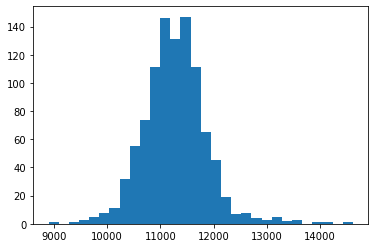

In [27]:
plt.hist(gen.scen_dict['North_Central']['1800'],bins=30)

(array([ 2.,  1.,  4.,  5.,  8., 12., 17., 22., 28., 32., 36., 38., 37.,
        36., 31., 27., 21., 16., 11.,  8.,  5.,  3.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-2.81023752, -2.57439991, -2.3385623 , -2.10272469, -1.86688708,
        -1.63104947, -1.39521186, -1.15937425, -0.92353664, -0.68769903,
        -0.45186142, -0.21602381,  0.0198138 ,  0.25565142,  0.49148903,
         0.72732664,  0.96316425,  1.19900186,  1.43483947,  1.67067708,
         1.90651469,  2.1423523 ,  2.37818991,  2.61402752,  2.84986513,
         3.08570274,  3.32154035,  3.55737796,  3.79321557,  4.02905318,
         4.26489079]),
 <BarContainer object of 30 artists>)

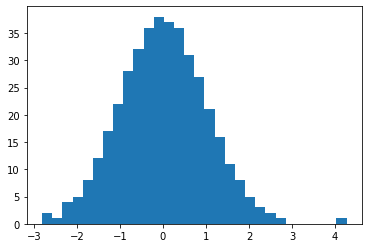

In [21]:
plt.hist(md.gauss_df['Coast_5'],bins=30)